In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast

In [2]:
df = pd.read_csv("results_BERT_Sports.csv")

In [13]:
import re

def parse_metrics(metric_string):
    lines = metric_string.strip().split('\n')
    class_metrics = {}

    for idx, line in enumerate(lines[2:-3]):  # Skip the header and footer lines
        values = re.findall(r'-?\d+\.\d+|-?\d+', line)

        # Print the values if found
        if values:
            class_label = int(values[0])
            precision, recall, f1_score, _ = map(float, values[1:])
            class_metrics[class_label] = {'precision': precision, 'recall': recall, 'f1-score': f1_score}
            print(f"Values for line {idx + 2}: {values}")

    return class_metrics

In [14]:
df["Classification"]

0                  precision    recall  f1-score   ...
1                  precision    recall  f1-score   ...
2                  precision    recall  f1-score   ...
3                  precision    recall  f1-score   ...
4                  precision    recall  f1-score   ...
5                  precision    recall  f1-score   ...
6                  precision    recall  f1-score   ...
7                  precision    recall  f1-score   ...
8                  precision    recall  f1-score   ...
9                  precision    recall  f1-score   ...
Name: Classification, dtype: object

In [15]:
import re

def parse_metrics(metric_string):
    lines = metric_string.strip().split('\n')
    class_metrics = {}

    for idx, line in enumerate(lines[2:-3]):  # Skip the header and footer lines
        values = re.findall(r'-?\d+\.\d+|-?\d+\.?\d*', line)

        # Print the values if found
        if values:
            class_label = f"class{int(float(values[0]))}_"
            precision, recall, f1_score, _ = map(float, values[1:])
            class_metrics[class_label + 'precision'] = precision
            class_metrics[class_label + 'recall'] = recall
            class_metrics[class_label + 'f1-score'] = f1_score

    return class_metrics

# Create a list of dictionaries
new_columns_list = []

for i in range(len(df["Classification"])):
    parsed_metrics = parse_metrics(df["Classification"].iloc[i])
    new_columns_list.append(parsed_metrics)

# Convert the list of dictionaries to a DataFrame
new_df = pd.DataFrame(new_columns_list)
print(new_df)

   class0_precision  class0_recall  class0_f1-score  class1_precision  \
0              0.09           0.66             0.15              0.96   
1              0.18           0.44             0.25              0.96   
2              0.10           0.90             0.17              0.98   
3              0.10           0.51             0.16              0.96   
4              0.07           0.55             0.12              0.96   
5              0.08           0.32             0.13              0.94   
6              0.09           0.48             0.15              0.96   
7              0.08           0.33             0.14              0.96   
8              0.07           0.81             0.13              0.97   
9              0.11           0.37             0.17              0.96   

   class1_recall  class1_f1-score  
0           0.51             0.67  
1           0.86             0.90  
2           0.36             0.53  
3           0.70             0.81  
4           0.60

In [16]:
new_df

,class0_precision,class0_recall,class0_f1-score,class1_precision,class1_recall,class1_f1-score
0,0.09,0.66,0.15,0.96,0.51,0.67
1,0.18,0.44,0.25,0.96,0.86,0.90
2,0.10,0.90,0.17,0.98,0.36,0.53
3,0.10,0.51,0.16,0.96,0.70,0.81
4,0.07,0.55,0.12,0.96,0.60,0.74
5,0.08,0.32,0.13,0.94,0.76,0.84
6,0.09,0.48,0.15,0.96,0.72,0.83
7,0.08,0.33,0.14,0.96,0.81,0.88
8,0.07,0.81,0.13,0.97,0.40,0.57
9,0.11,0.37,0.17,0.96,0.85,0.90


In [17]:
df

,Unnamed: 0,Accuracy,Train Losses,Test Losses,MAE,Classification
0,0,0.521222,"[0.6994313164190813, 0.7006227807565168, 0.695...","[0.6942348480224609, 0.693554957707723, 0.6920...",0.478778,precision recall f1-score ...
1,1,0.828523,"[0.6949287002736871, 0.6930005062710155, 0.690...","[0.693121333916982, 0.6921798984209696, 0.6908...",0.171477,precision recall f1-score ...
2,2,0.398981,"[0.6963747414675626, 0.6921175447377291, 0.693...","[0.696105937163035, 0.6905549764633179, 0.6881...",0.601019,precision recall f1-score ...
3,3,0.687606,"[0.6924490332603455, 0.6891947605393149, 0.687...","[0.6916471521059672, 0.6897278229395548, 0.688...",0.312394,precision recall f1-score ...
4,4,0.595925,"[0.6970333782109347, 0.6953834782947194, 0.692...","[0.6948752601941427, 0.6933110356330872, 0.691...",0.404075,precision recall f1-score ...
5,5,0.733447,"[0.701641174879941, 0.6964751156893644, 0.6917...","[0.6948778430620829, 0.6933851440747579, 0.692...",0.266553,precision recall f1-score ...
6,6,0.711375,"[0.6936249353668906, 0.6919967857274142, 0.689...","[0.6920345226923624, 0.691513180732727, 0.6912...",0.288625,precision recall f1-score ...
7,7,0.782683,"[0.6976518414237283, 0.6915945952588861, 0.686...","[0.6911542614301046, 0.6912977695465088, 0.691...",0.217317,precision recall f1-score ...
8,8,0.424448,"[0.6923544732007113, 0.6905910210175947, 0.690...","[0.6948057810465494, 0.6944393118222555, 0.693...",0.575552,precision recall f1-score ...
9,9,0.823430,"[0.6998040730302985, 0.6891258467327465, 0.689...","[0.6933739384015402, 0.6920967499415079, 0.691...",0.176570,precision recall f1-score ...


In [4]:
train_losses = []
for i in range(len(df["Train Losses"])):
    train_losses.append(np.array(ast.literal_eval(df["Train Losses"][i])))

# test_losses = []
# for i in range(len(df["Test Losses"])):
#     test_losses.append(np.array(ast.literal_eval(df["Test Losses"][i])))
    

In [5]:
train_losses

[array([0.69943132, 0.70062278, 0.69535596, 0.6914228 , 0.69058573,
        0.6894776 , 0.69401337, 0.68779725, 0.69073582, 0.68604796]),
 array([0.6949287 , 0.69300051, 0.69049203, 0.68791359, 0.68654229,
        0.68517545, 0.68617331, 0.68243602, 0.68065837, 0.68167892]),
 array([0.69637474, 0.69211754, 0.69358315, 0.69052549, 0.68593834,
        0.68556768, 0.68674555, 0.68274425, 0.68455536, 0.68122902]),
 array([0.69244903, 0.68919476, 0.68796649, 0.68759377, 0.68695073,
        0.68699846, 0.68301852, 0.68223512, 0.67801645, 0.68187122]),
 array([0.69703338, 0.69538348, 0.69279346, 0.69235567, 0.69041677,
        0.69071245, 0.68598301, 0.6872742 , 0.68716695, 0.68653365]),
 array([0.70164117, 0.69647512, 0.69177256, 0.69266802, 0.69384083,
        0.6931185 , 0.69126616, 0.68787902, 0.68778962, 0.68705635]),
 array([0.69362494, 0.69199679, 0.68933317, 0.68488192, 0.68740636,
        0.68440145, 0.68256853, 0.68732289, 0.68343085, 0.68085585]),
 array([0.69765184, 0.6915946 , 0.

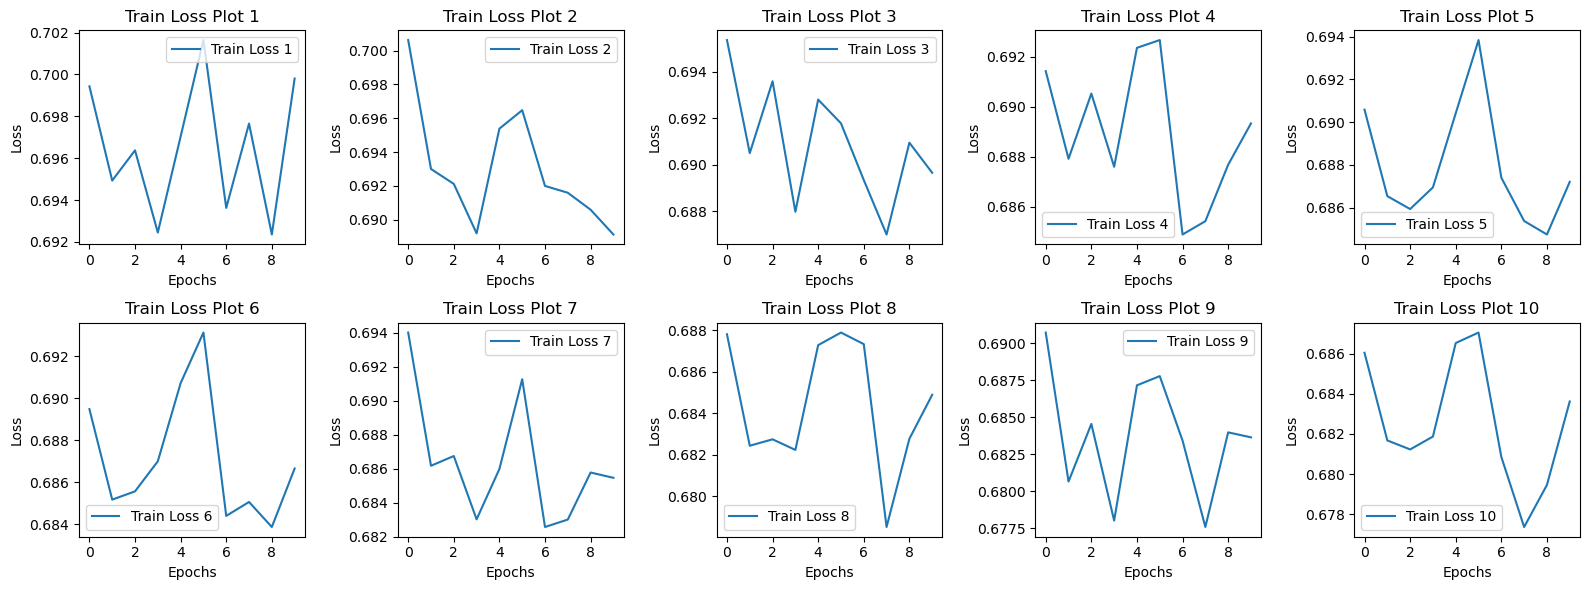

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
train_losses = np.array(train_losses)
test_losses = np.array(train_losses)

# Create a 2x5 grid of subplots
fig, axs = plt.subplots(2, 5, figsize=(16, 6))

# Plot Train and Test Losses
for i in range(len(train_losses)):
    row = i // 5  # Determine the row (0 or 1)
    col = i % 5   # Determine the column (0 to 4)
    ax = axs[row, col]
    
    ax.plot(train_losses[:, i], label=f"Train Loss {i+1}")
    ax.set_xlabel("Epochs")  # X-axis title
    ax.set_ylabel("Loss")  # Y-axis title
    ax.set_title(f"Train Loss Plot {i+1}")
    ax.legend()

# Add some spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()